# IS 4487 Lab 7

## Outline

Begin where you left on in Lab 6 with the *SuperStore Retail Orders* dataset

<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Labs/Scripts/lab7_retailer_eda2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [96]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


## Load Libraries

➡️ Assignment Tasks
- Load any necessary libraries

In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

## Import Data into Dataframe

➡️ Assignment Tasks
- Import data from the SuperStore retail dataset into a dataframe (in GitHub go to Labs > DataSets)
- Describe or profile the dataframe

In [98]:
df = pd.read_csv (r'/content/drive/MyDrive/Colab Notebooks/superstore_retail_orders.csv')
df.describe()

,customer_id,postal_code,order_id,customer_id.1,order_id.1,product_id,quantity,product_id.1
count,9569.000000,9416.000000,9569.000000,9569.000000,9569.000000,9569.000000,9513.000000,9569.000000
mean,282.910962,52225.007116,5107.539450,282.910962,5107.539450,106.736650,3.453380,106.736650
std,199.763947,29619.544418,2043.449403,199.763947,2043.449403,3.694805,4.393894,3.694805
min,1.000000,1105.000000,1001.000000,1.000000,1001.000000,101.000000,1.000000,101.000000
25%,127.000000,27409.000000,3393.000000,127.000000,3393.000000,104.000000,1.000000,104.000000
50%,253.000000,48295.000000,5577.000000,253.000000,5577.000000,107.000000,1.000000,107.000000
75%,376.000000,79923.000000,6829.000000,376.000000,6829.000000,110.000000,4.000000,110.000000
max,800.000000,99812.000000,8147.000000,800.000000,8147.000000,114.000000,20.000000,114.000000


## Prepare Data

➡️ Assignment Tasks
- Convert any numbers into the correct datatype if they are not already numeric
- Convert any character variables in to factors if they are appropriate for that datatype
- Check for outliers.   Remove any outliers that appear to be mistakes
- Remove rows with empty (NULL) values
- Identify at least one variable with a missing value that can be imputed.   Fill in those empty values.
- Add a "total_amount" variable based on the quantity and price

In [99]:
#data preparation
df['total_amount'] = df['total_amount'].str.replace('$', '').str.replace(',', '').astype(float)
df['product_price'] = df['product_price'].str.replace('$', '').str.replace(',', '').astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9569 entries, 0 to 9568
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       9569 non-null   int64  
 1   customer_name     9569 non-null   object 
 2   address_line_1    9448 non-null   object 
 3   city              9516 non-null   object 
 4   state_province    9569 non-null   object 
 5   postal_code       9416 non-null   float64
 6   order_id          9569 non-null   int64  
 7   order_date        9312 non-null   object 
 8   customer_id.1     9569 non-null   int64  
 9   order_id.1        9569 non-null   int64  
 10  product_id        9569 non-null   int64  
 11  quantity          9513 non-null   float64
 12  product_id.1      9569 non-null   int64  
 13  product_name      9569 non-null   object 
 14  product_price     9569 non-null   float64
 15  total_amount      9513 non-null   float64
 16  order_year_month  9312 non-null   object 


<ipython-input-99-393e72f4667c>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['total_amount'] = df['total_amount'].str.replace('$', '').str.replace(',', '').astype(float)
<ipython-input-99-393e72f4667c>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['product_price'] = df['product_price'].str.replace('$', '').str.replace(',', '').astype(float)


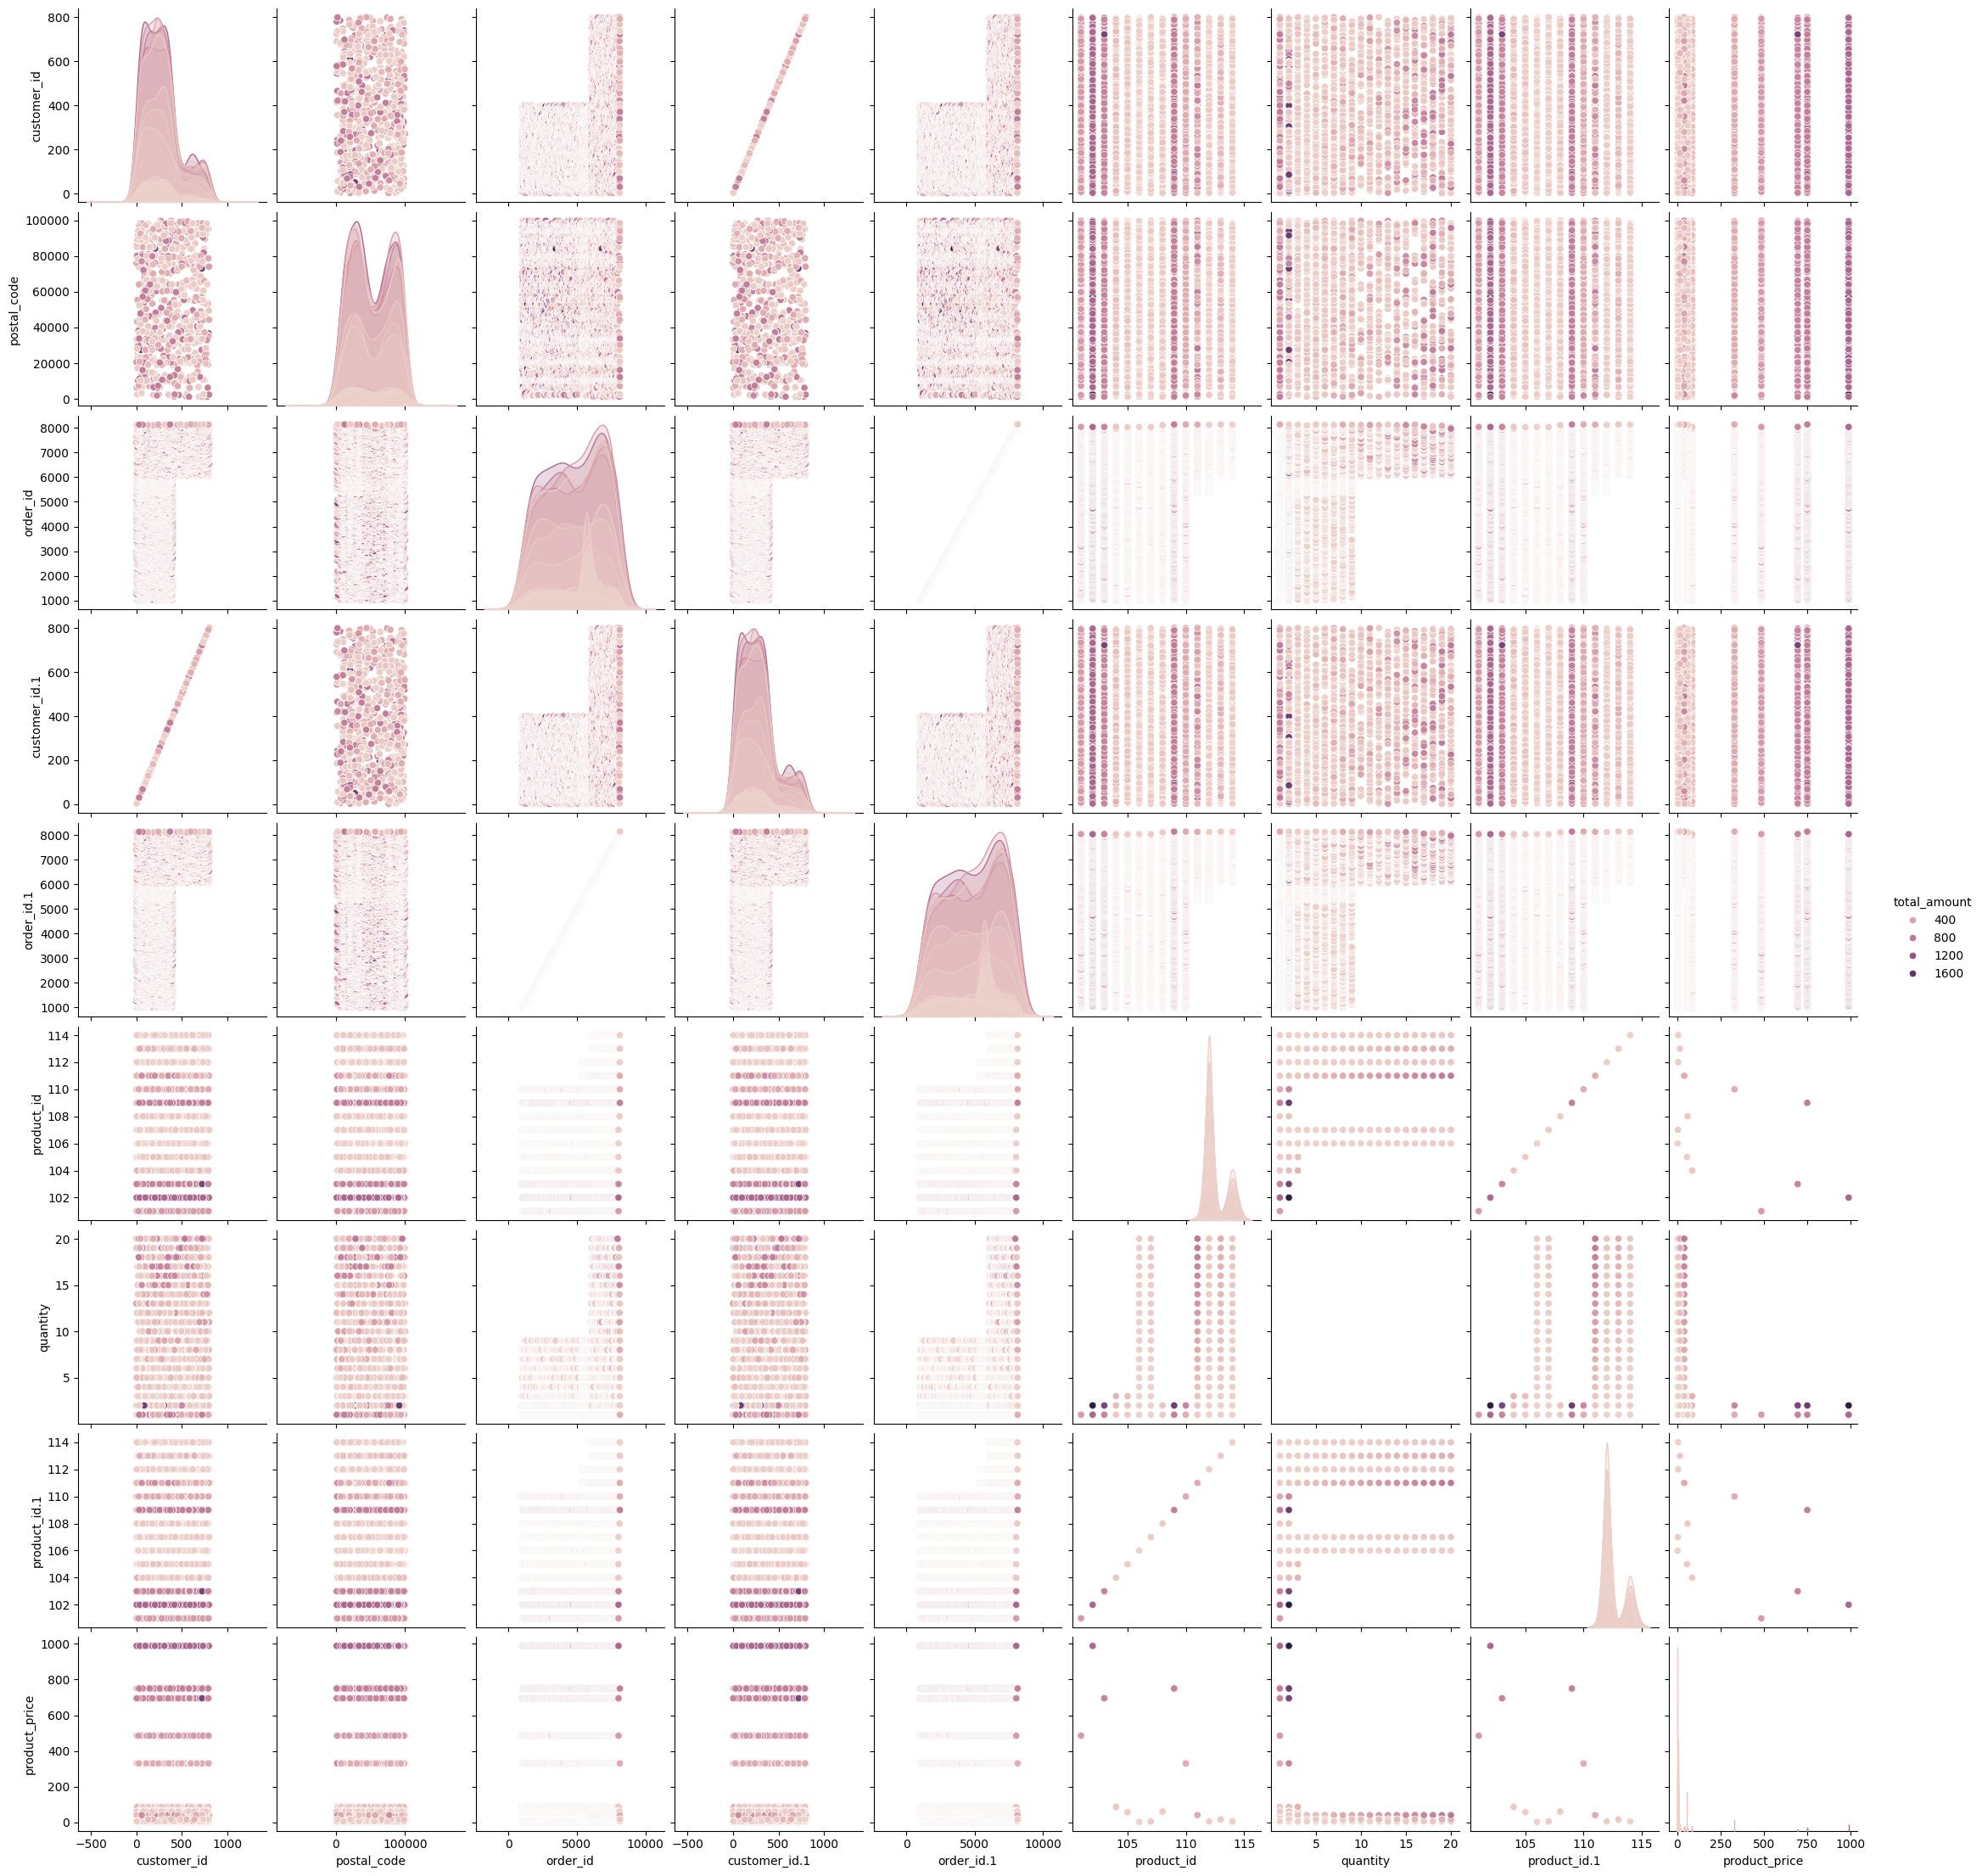

In [100]:
#outlier check and cleanup
sb.pairplot(df, hue='total_amount')

In [101]:
state_codes = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

def map_state(state):
    return state_codes.get(state.strip(), state.strip())

df['state_province'] = df['state_province'].apply(map_state)

df['state_province'] = df['state_province'].astype('category')

df['state_province']

0       DE
1       AL
2       CA
3       VA
4       VA
        ..
9564    PA
9565    NY
9566    CA
9567    MA
9568    MD
Name: state_province, Length: 9569, dtype: category
Categories (48, object): ['AK', 'AL', 'AR', 'AZ', ..., 'WA', 'WI', 'WV', 'WY']

In [102]:
#impute values
null_values = df[df.isnull().any(axis=1)]

print(null_values)

      customer_id       customer_name          address_line_1           city  \
5730          435        Kennith Cake     30917 Starling Hill        Orlando   
5741          297  Lucita O'Callaghan           6 South Drive  San Francisco   
5748          704        Val Ellsbury  75253 Bultman Crossing            NaN   
5749          793    Britni Heinemann     629 Old Shore Drive    Baton Rouge   
5755          437      Sumner Plastow         05 Bunting Hill        Norwalk   
...           ...                 ...                     ...            ...   
9550          724      Karlotte Beste       5819 Sage Terrace            NaN   
9558          656    Emmerich Privost                     NaN     Washington   
9562          782       Edmund Hugues       814 Scott Terrace    Kansas City   
9563          722     Marwin Darrigoe       22 South Crossing        Houston   
9564          637   Jayson Andriessen  0819 Crownhardt Circle      Allentown   

     state_province  postal_code  order

## Prepare Data - Continued

➡️ Assignment Tasks
- Create a variable called "complete_customer_info".   Use "1" for True and "2" for False.  All customer fields must be valid and not empty before this variable is True.
- Create a bar chart showing the count of customers with complete informaiton versus incomplete information

In [103]:
#create variable
mask = ~(df[['customer_id', 'customer_name', 'address_line_1', 'city', 'state_province', 'postal_code', 'order_id', 'order_date', 'product_id', 'quantity', 'product_name', 'product_price', 'total_amount', 'order_year_month', 'order_month']].isnull().any(axis=1))

df['complete_customer_info'] = mask.astype(int) + 1

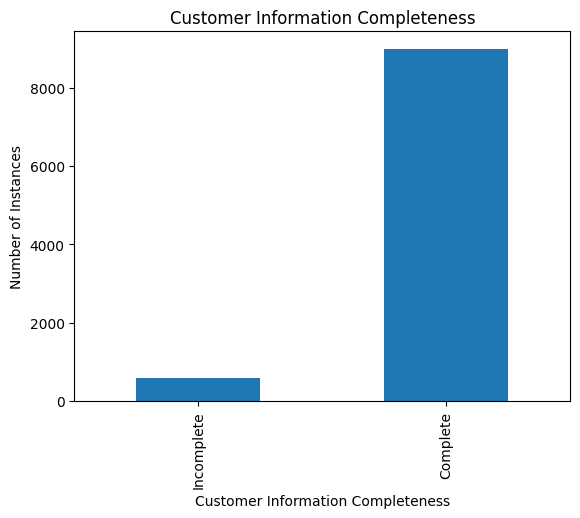

In [104]:
#create chart
completeness = df.groupby('complete_customer_info')['complete_customer_info'].count()
completeness.plot.bar()
plt.xticks(ticks=[0, 1], labels=['Incomplete', 'Complete'])
plt.xlabel('Customer Information Completeness')
plt.ylabel('Number of Instances')
plt.title('Customer Information Completeness')
plt.show()

## Prepare Data - Continued

➡️ Assignment Tasks
- Create seasonal buckets for Winter, Sprint, Summer, Fall
- Create a chart to show revenue by season
- Create a chart to show revenue by year

In [105]:
#seasonality
df['order_month'] = df['order_month'].str.replace(' ', '')
season_mapping = {
    'January': 'Winter', 'February': 'Winter', 'March': 'Spring',
    'April': 'Spring', 'May': 'Spring', 'June': 'Summer',
    'July': 'Summer', 'August': 'Summer', 'September': 'Fall',
    'October': 'Fall', 'November': 'Fall', 'December': 'Winter'
}

df['season'] = df['order_month'].map(season_mapping)

print(df)

      customer_id      customer_name          address_line_1          city  \
0              67      Gordy Matteau     59 Northland Circle    Wilmington   
1             201     Cort Paskerful         769 Buell Drive    Huntsville   
2              45    Willetta Lumley       41 Ridgeway Alley        Irvine   
3             106   Alison Batterton           489 Erie Hill      Richmond   
4             357  Martelle Paxeford    451 Manitowish Place      Richmond   
...           ...                ...                     ...           ...   
9564          637  Jayson Andriessen  0819 Crownhardt Circle     Allentown   
9565          370    Darby Tesseyman     7468 Jackson Circle        Albany   
9566          598   Henka De Ferrari      89 Sunnyside Drive  Redwood City   
9567          737    Tommie Penvarne    9630 Washington Hill     Watertown   
9568          482       Matelda Bull      6406 Bultman Alley  Gaithersburg   

     state_province  postal_code  order_id  order_date  custome

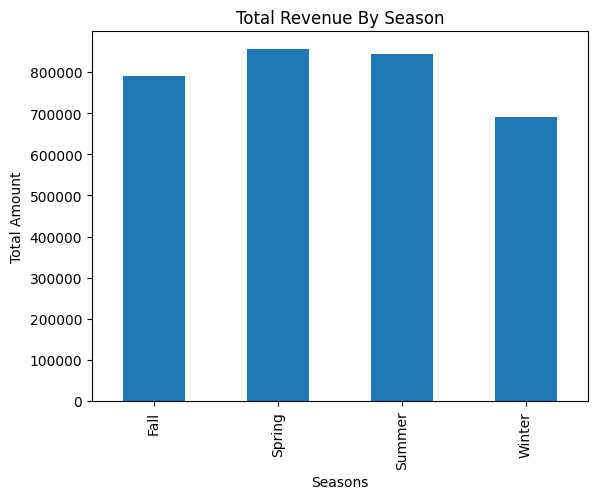

In [106]:
seasons = df.groupby('season')['total_amount'].sum()
seasons.plot.bar()
plt.xlabel('Seasons')
plt.ylabel('Total Amount')
plt.title('Total Revenue By Season')
plt.show()

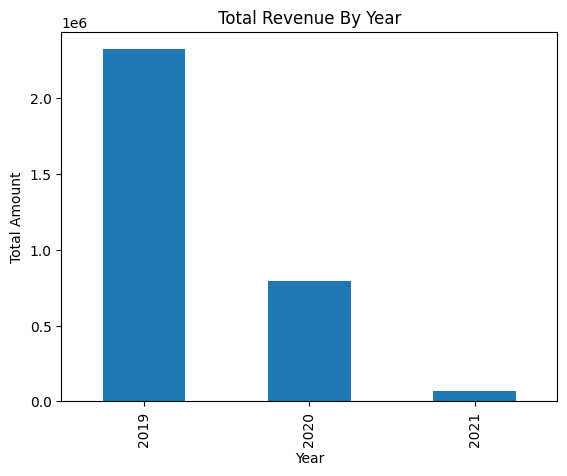

In [107]:
#revenue over time
df['order_year'] = df['order_year_month'].str.split('-').str[0]
years = df.groupby('order_year')['total_amount'].sum()
years.plot.bar()
plt.xlabel('Year')
plt.ylabel('Total Amount')
plt.title('Total Revenue By Year')
plt.show()

## Prepare Data - Continued

➡️ Assignment Tasks
- Create a variable that will group product lines into "Outdoor" versus "Indoor" products.
- Create a plot to show the correlation between outdoor/indoor versus season  

In [108]:
df['product_name'].unique()

array(['Great value Juice', 'Desk', 'Dove deodorant', 'Office Chair',
       'Dell E5470 Laptop', 'Apple iPad Mini', 'Printer',
       'Apple iPhone X', 'Apple Laptop', 'Samsung Galaxy Note 10',
       'Printer Ink Cartridge', 'White print/copy paper',
       'Black Pens, 12-pack', 'Extension cord'], dtype=object)

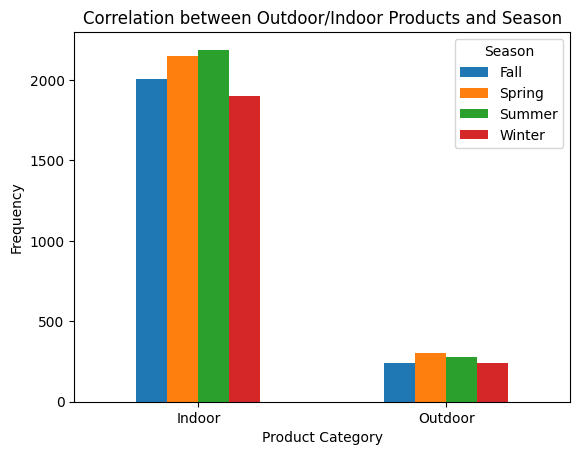

In [109]:
#indoor/outdoor variable
outdoor_products = ['Great value Juice','Extension cord']
indoor_products = ['Dove deodorant', 'Dell E5470 Laptop', 'Apple iPad Mini', 'Printer', 'Apple iPhone X',
                   'Apple Laptop', 'Samsung Galaxy Note 10', 'Printer Ink Cartridge', 'White print/copy paper',
                   'Black Pens, 12-pack', 'Desk','Office Chair']

df['product_category'] = df['product_name'].apply(lambda x: 'Outdoor' if x in outdoor_products else 'Indoor')

cross_tab = pd.crosstab(df['product_category'], df['season'])

cross_tab.plot(kind='bar')
plt.xlabel('Product Category')
plt.ylabel('Frequency')
plt.title('Correlation between Outdoor/Indoor Products and Season')
plt.xticks(rotation=0)
plt.legend(title='Season')
plt.show()